<h3 align=middle style="line-height:500%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Project Three, Question Two, Part Three
</font>
</h3>

<h3 align=left style="line-height:500%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Part Three:
</font>
</h3>

We have pretty much processed our data through parts 1&2 and now we have a great view about its columns and their relations, so we will just impor the data saved in the previous notebook and continue our journey.

<h3 align=left style="line-height:500%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Preprocessing phase:
</font>
</h3>

In [1]:
pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 21.2 MB/s eta 0:00:00


In [2]:
import numpy as np
from numpy import asarray
from numpy import zeros
import pandas as pd
import seaborn as sns
import re
import string
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from nltk.tokenize import RegexpTokenizer
import nltk
from keras.models import Sequential
from keras.utils import to_categorical
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Embedding, Flatten, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import precision_score, recall_score, f1_score


nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
!gdown 1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW

Downloading...
From: https://drive.google.com/uc?id=1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW
To: /content/train_data.csv
100% 635M/635M [00:03<00:00, 160MB/s]


In [4]:
!gdown 1-8TsrqTRFP-q9TM-6HinhO0ZVXFHq9TB

Downloading...
From: https://drive.google.com/uc?id=1-8TsrqTRFP-q9TM-6HinhO0ZVXFHq9TB
To: /content/test_data.csv
100% 15.6M/15.6M [00:00<00:00, 168MB/s]


In [5]:
train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")

<ipython-input-5-4e17d86d315d>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("train_data.csv")


In this problem, we just want to focus on the classic "Sentiment analysis using text data" problem, and thence we will use only two columns: reviewText, overall.

In [6]:
train = train[["reviewText", "overall"]]
test = test[["reviewText"]]

We have already lowercased all of our data and implemented lemmatization and some other stuff, but just in case we will be doing some of that preprocessing again to make the model compatible to what we are pursuing.

After that we will need to handle imbalancement.

Based on the train data size, we have decided not to oversample anything. Despite loosing some data, we will need less time adjusting our model and we can always go back to oversampling, but for now we will undersample all the classes to 50000 rows.

Imbalancement Handling:

In [7]:
undersampler = RandomUnderSampler(sampling_strategy={1: 80000, 2: 50000, 3: 80000, 4: 99999, 5: 99999}, random_state=78)
oversampler = RandomOverSampler(sampling_strategy={1: 100000, 2: 100000, 3: 100000, 4: 100000, 5: 100000}, random_state=78)

X_resampled, y_resampled = undersampler.fit_resample(train.drop(columns=["overall"]), train['overall'])
X_resampled, y_resampled = oversampler.fit_resample(X_resampled, y_resampled)

/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (100000) in class 1 will be larger than the number of samples in the majority class (class #4 -> 99999)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (100000) in class 2 will be larger than the number of samples in the majority class (class #4 -> 99999)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (100000) in class 3 will be larger than the number of samples in the majority class (class #4 -> 99999)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (100000) in class 4 will be larger than the number of samples in the majority class (class #4 -> 99999)
  warning

In [8]:
balanced_distribution = y_resampled.value_counts().sort_index()
print("Balanced Rating Distribution:")
print(balanced_distribution)

Balanced Rating Distribution:
1    100000
2    100000
3    100000
4    100000
5    100000
Name: overall, dtype: int64


Text Processing:

In [9]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

In [10]:
verbs = set()
verbs.add("wouldn't")
verbs.add("wouldn")
verbs.add("won't")
verbs.add("will")
verbs.add("weren't")
verbs.add("weren")
verbs.add("were")
verbs.add("wasn't")
verbs.add("wasn")
verbs.add("was")
verbs.add("shouldn't")
verbs.add("shouldn")
verbs.add("should've")
verbs.add("should")
verbs.add("needn't")
verbs.add("mustn't")
verbs.add("mustn")
verbs.add("mightn")
verbs.add("it's")
verbs.add("is")
verbs.add("isn")
verbs.add("isn't")
verbs.add("have")
verbs.add("haven't")
verbs.add("haven")
verbs.add("having")
verbs.add("has")
verbs.add("hasn't")
verbs.add("hasn")
verbs.add("had")
verbs.add("hadn't")
verbs.add("hadn")
verbs.add("been")
verbs.add("can")
verbs.add("couldn't")
verbs.add("couldn")
verbs.add("did")
verbs.add("didn")
verbs.add("didn't")
verbs.add("do")
verbs.add("does")
verbs.add("doesen't")
verbs.add("doesen")
verbs.add("doin")
verbs.add("doing")
verbs.add("don")
verbs.add("don't")
verbs.add("are")
verbs.add("aren")
verbs.add("aren't")


stop = stop - verbs
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'as',
 'at',
 'be',
 'because',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'd',
 'doesn',
 "doesn't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'it',
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 "mightn't",
 'more',
 'most',
 'my',
 'myself',
 'needn',
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'shan',
 "shan't",
 'she',
 "she's",
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 "that'll",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'this',
 'those',
 'through',
 'to',
 'too',
 'under',
 'until',
 'up',
 've',
 'very',
 'we',
 'what',
 'wh

In [11]:
punctuation = list(string.punctuation)
stop.update(punctuation)

In [12]:
#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text):
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ') #remove \n and \r
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

def split_into_words(text):
    # split into words by white space
    words = text.split()
    return words

def to_lower_case(words):
    # convert to lower case
    words = [word.lower() for word in words]
    return words

def remove_punctuation(words):
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    stripped = [re_punc.sub('', w) for w in words]
    return stripped

def keep_alphabetic(words):
    # remove remaining tokens that are not alphabetic
    words = [word for word in words if word.isalpha()]
    return words

def remove_stopwords(words):
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    return words

def to_sentence(words):
    # join words to a sentence
    return ' '.join(words)

In [13]:
def denoise_text(text):
    words = strip_all_entities(text)
    words = split_into_words(text)
    words = to_lower_case(words)
    words = remove_punctuation(words)
    words = keep_alphabetic(words)
    words = remove_stopwords(words)

    return to_sentence(words)

In [14]:
X_resampled.reviewText

0         These headsets look like the real deal, the so...
1         A cable really has one job and this one fails....
2         All I can say is awful,worked for a few days t...
3         I own a\nB.Trek H9: POWERFUL BASS\nB.Trek H10:...
4         I ordered three (3) separate sizes of GearIt C...
                                ...                        
499995    About what you would expect for a cheap $25 pa...
499996    The detector is good but the mounting bracket ...
499997    Slow writing and reading speed. Its good for s...
499998    Great, easy to use interface with easy to find...
499999    is better that I thought it would be.\nworks o...
Name: reviewText, Length: 500000, dtype: object

In [15]:
X_resampled.reviewText = X_resampled.reviewText.astype(str).apply(denoise_text)
test.reviewText = test.reviewText.apply(denoise_text)

We will tokenize, stemm and lemmatize again:

In [16]:
tokenizer = RegexpTokenizer(r'\w+')
X_resampled['reviewText'] = X_resampled['reviewText'].apply(tokenizer.tokenize)
test['reviewText'] = test['reviewText'].apply(tokenizer.tokenize)

In [17]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

X_resampled['reviewText'] = X_resampled['reviewText'].apply(lambda x: stemming_on_text(x))
test['reviewText'] = test['reviewText'].apply(lambda x: stemming_on_text(x))

In [18]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

X_resampled['reviewText'] = X_resampled['reviewText'].apply(lambda x: lemmatizer_on_text(x))
test['reviewText'] = test['reviewText'].apply(lambda x: lemmatizer_on_text(x))

Just copying test!

In [19]:
newtest = test.copy()

<h3 align=left style="line-height:500%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Validation Splitting:
</font>
</h3>

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, shuffle=True)

In [21]:
X_train = X_train.reviewText
X_test = X_test.reviewText
newtest = newtest.reviewText

In [22]:
y_train -= 1
y_test -= 1
y_train_onehot = to_categorical(y_train)
y_eval_onehot = to_categorical(y_test)

<h3 align=left style="line-height:500%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Embedding our Data:
</font>
</h3>

Turning text data into numbers

In [23]:
word_tok = Tokenizer()
word_tok.fit_on_texts(X_train)

X_train = word_tok.texts_to_sequences(X_train)
X_test = word_tok.texts_to_sequences(X_test)
newtest = word_tok.texts_to_sequences(newtest)

In [24]:
voc_len = len(word_tok.word_index) + 1
voc_len

180782

In [25]:
max_len  = 100

X_train = pad_sequences(X_train, padding="post", maxlen=max_len)
X_test = pad_sequences(X_test, padding="post", maxlen=max_len)
newtest = pad_sequences(newtest, padding="post", maxlen=max_len)

In [26]:
embedding_dict = dict()
glove_file = open("glove.6B.100d.txt", encoding = "utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vec_dim = asarray(records[1:], dtype="float32")
    embedding_dict [word] = vec_dim

glove_file.close()

In [27]:
embedding_matrix = np.zeros((voc_len, max_len))
for word, index in word_tok.word_index.items():
    embedding_vec = embedding_dict.get(word)
    if embedding_vec is not None:
        embedding_matrix[index] = embedding_vec

In [28]:
embedding_matrix.shape

(180782, 100)

<h3 align=left style="line-height:500%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Overviewing Data:
</font>
</h3>

In [29]:
X_train

array([[  30,    5,  365, ...,    0,    0,    0],
       [  25,   98,    9, ...,    0,    0,    0],
       [   3,   49,   13, ...,    0,    0,    0],
       ...,
       [2634,  847,   27, ...,    0,    0,    0],
       [1121,    8,   34, ...,   83,  367, 5007],
       [  46, 1032,  912, ...,    0,    0,    0]], dtype=int32)

In [30]:
X_test

array([[   52,    48,    59, ...,     0,     0,     0],
       [  218,    17,  5788, ...,     0,     0,     0],
       [  132,   882,    23, ...,     0,     0,     0],
       ...,
       [ 1080,   278,  3807, ...,     0,     0,     0],
       [41178,   355,   951, ...,  1149,    87,    69],
       [  110,    43,   159, ...,     0,     0,     0]], dtype=int32)

In [31]:
newtest

array([[ 454,  667,   36, ...,    0,    0,    0],
       [   1, 4091,  922, ...,    0,    0,    0],
       [ 180,  643, 1984, ...,    0,    0,    0],
       ...,
       [ 236,  492,  707, ...,    0,    0,    0],
       [  27,  694, 6126, ...,    0,    0,    0],
       [ 447,   43,  294, ...,  244,   20,  111]], dtype=int32)

<h3 align=left style="line-height:500%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Going for different Models:
</font>
</h3>

We'll start by a very simple nn model:

In [32]:
snn = Sequential()
emb_layer = Embedding(voc_len, 100, weights = [embedding_matrix], input_length = max_len, trainable = False)
snn.add(emb_layer)
snn.add(Flatten())
snn.add(Dense(5, activation = "sigmoid"))

In [33]:
snn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
snn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          18078200  
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 5)                 50005     
                                                                 
Total params: 18128205 (69.15 MB)
Trainable params: 50005 (195.33 KB)
Non-trainable params: 18078200 (68.96 MB)
_________________________________________________________________


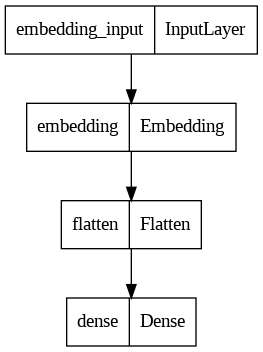

In [34]:
tf.keras.utils.plot_model(snn)

In [35]:
snn_history = snn.fit(X_train, y_train_onehot, batch_size=128, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5
2500/2500 [==============================] - 12s 3ms/step - loss: 1.4991 - accuracy: 0.3679 - val_loss: 1.5045 - val_accuracy: 0.3800
Epoch 2/5
2500/2500 [==============================] - 9s 4ms/step - loss: 1.4550 - accuracy: 0.3980 - val_loss: 1.5050 - val_accuracy: 0.3826
Epoch 3/5
2500/2500 [==============================] - 9s 4ms/step - loss: 1.4472 - accuracy: 0.4049 - val_loss: 1.5300 - val_accuracy: 0.3821
Epoch 4/5
2500/2500 [==============================] - 8s 3ms/step - loss: 1.4469 - accuracy: 0.4055 - val_loss: 1.5389 - val_accuracy: 0.3801
Epoch 5/5
2500/2500 [==============================] - 9s 4ms/step - loss: 1.4454 - accuracy: 0.4076 - val_loss: 1.5222 - val_accuracy: 0.3846


In [36]:
snn_score = snn.evaluate(X_test, y_eval_onehot, verbose=1)

3125/3125 [==============================] - 10s 3ms/step - loss: 1.5207 - accuracy: 0.3848


In [37]:
ans = snn.predict(X_test, verbose=1)
max_indices = np.argmax(ans, axis=1)
zeros_array = np.zeros_like(ans)
zeros_array[np.arange(len(ans)), max_indices] = 1
indices = np.argwhere(zeros_array == 1)
indices = indices[:, 1]
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, indices, average='micro')
recall = recall_score(y_test, indices, average='micro')
f1 = f1_score(y_test, indices, average='micro')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

3125/3125 [==============================] - 7s 2ms/step
Precision: 0.38
Recall: 0.38
F1 Score: 0.38


array([[<Axes: title={'center': 'predicted'}>]], dtype=object)

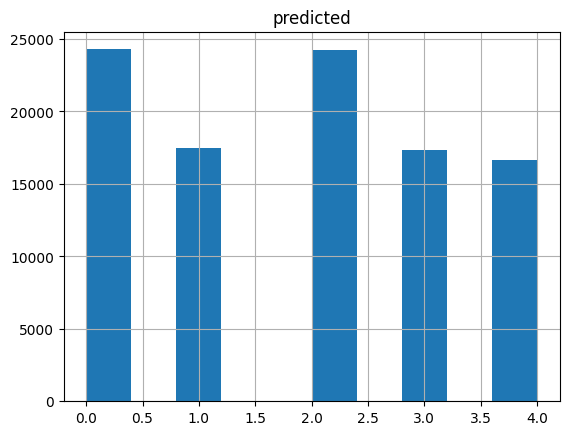

In [38]:
df_train = pd.DataFrame({'predicted': indices})
df_train.hist()

In [39]:
unique_values, counts = np.unique(indices, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f'Value: {value}, Count: {count}')

Value: 0, Count: 24288
Value: 1, Count: 17465
Value: 2, Count: 24268
Value: 3, Count: 17336
Value: 4, Count: 16643


In [40]:
snn.save('SNN')

Not that appealing!

Let's go for a CNN:

In [41]:
cnn = Sequential()
emb_layer = Embedding(voc_len, 100, weights = [embedding_matrix], input_length = max_len, trainable = False)
cnn.add(emb_layer)
cnn.add(Conv1D(128, 5, activation="relu"))
cnn.add(GlobalMaxPooling1D())
cnn.add(Dense(5, activation = "sigmoid"))

In [42]:
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          18078200  
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 18142973 (69.21 MB)
Trainable params: 64773 (253.02 KB)
Non-trainable params: 18078200 (68.96 MB)
_________________________________________________________________


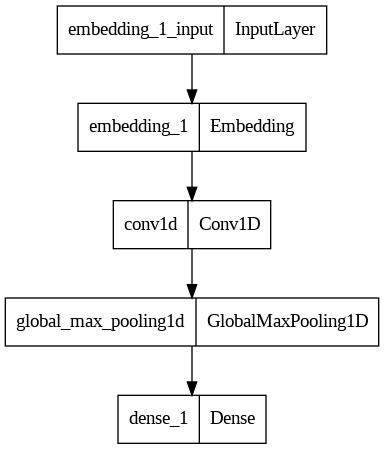

In [43]:
tf.keras.utils.plot_model(cnn)

In [44]:
cnn_history = cnn.fit(X_train, y_train_onehot, batch_size=128, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5
2500/2500 [==============================] - 18s 5ms/step - loss: 1.2802 - accuracy: 0.4437 - val_loss: 1.2049 - val_accuracy: 0.4784
Epoch 2/5
2500/2500 [==============================] - 13s 5ms/step - loss: 1.1627 - accuracy: 0.5021 - val_loss: 1.1784 - val_accuracy: 0.4911
Epoch 3/5
2500/2500 [==============================] - 12s 5ms/step - loss: 1.1155 - accuracy: 0.5281 - val_loss: 1.1650 - val_accuracy: 0.5006
Epoch 4/5
2500/2500 [==============================] - 12s 5ms/step - loss: 1.0825 - accuracy: 0.5443 - val_loss: 1.1625 - val_accuracy: 0.5066
Epoch 5/5
2500/2500 [==============================] - 11s 5ms/step - loss: 1.0565 - accuracy: 0.5570 - val_loss: 1.1722 - val_accuracy: 0.5029


In [45]:
cnn_score = cnn.evaluate(X_test, y_eval_onehot, verbose=1)

3125/3125 [==============================] - 10s 3ms/step - loss: 1.1729 - accuracy: 0.5048


In [46]:
ans = cnn.predict(X_test, verbose=1)
max_indices = np.argmax(ans, axis=1)
zeros_array = np.zeros_like(ans)
zeros_array[np.arange(len(ans)), max_indices] = 1
indices = np.argwhere(zeros_array == 1)
indices = indices[:, 1]
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, indices, average='micro')
recall = recall_score(y_test, indices, average='micro')
f1 = f1_score(y_test, indices, average='micro')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

3125/3125 [==============================] - 7s 2ms/step
Precision: 0.50
Recall: 0.50
F1 Score: 0.50


array([[<Axes: title={'center': 'predicted'}>]], dtype=object)

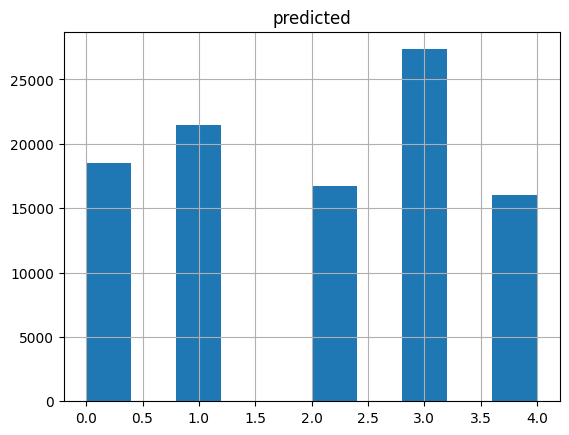

In [47]:
df_train = pd.DataFrame({'predicted': indices})
df_train.hist()

In [48]:
unique_values, counts = np.unique(indices, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f'Value: {value}, Count: {count}')

Value: 0, Count: 18535
Value: 1, Count: 21425
Value: 2, Count: 16703
Value: 3, Count: 27342
Value: 4, Count: 15995


In [49]:
cnn.save('CNN')

And now an RNN (LSTM):

In [113]:
import tensorflow as tf
rnn = Sequential()
emb_layer = Embedding(voc_len, 100, weights = [embedding_matrix], input_length = max_len, trainable = False)
rnn.add(emb_layer)
rnn.add(LSTM(256))
rnn.add(Dropout(0.1))
rnn.add(Dense(5, activation = "sigmoid"))

In [114]:
rnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
rnn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 100)          18078200  
                                                                 
 lstm_9 (LSTM)               (None, 256)               365568    
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 5)                 1285      
                                                                 
Total params: 18445053 (70.36 MB)
Trainable params: 366853 (1.40 MB)
Non-trainable params: 18078200 (68.96 MB)
_________________________________________________________________


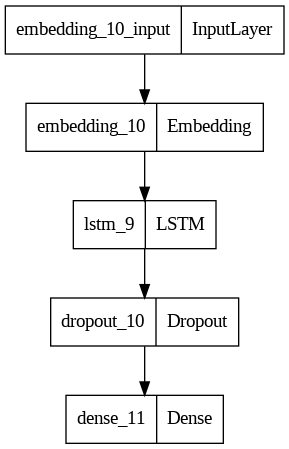

In [115]:
tf.keras.utils.plot_model(rnn)

In [116]:
rnn_history = rnn.fit(X_train, y_train_onehot, batch_size=256, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 39s 30ms/step - loss: 1.3596 - accuracy: 0.3894 - val_loss: 1.2465 - val_accuracy: 0.4567
Epoch 2/10
1250/1250 [==============================] - 36s 29ms/step - loss: 1.2018 - accuracy: 0.4766 - val_loss: 1.1444 - val_accuracy: 0.5003
Epoch 3/10
1250/1250 [==============================] - 35s 28ms/step - loss: 1.1252 - accuracy: 0.5117 - val_loss: 1.1133 - val_accuracy: 0.5162
Epoch 4/10
1250/1250 [==============================] - 34s 27ms/step - loss: 1.0724 - accuracy: 0.5357 - val_loss: 1.0810 - val_accuracy: 0.5311
Epoch 5/10
1250/1250 [==============================] - 34s 27ms/step - loss: 1.0309 - accuracy: 0.5552 - val_loss: 1.0829 - val_accuracy: 0.5325
Epoch 6/10
1250/1250 [==============================] - 37s 30ms/step - loss: 0.9915 - accuracy: 0.5738 - val_loss: 1.0759 - val_accuracy: 0.5359
Epoch 7/10
1250/1250 [==============================] - 38s 30ms/step - loss: 0.9515 - accuracy: 0.5933 - val_loss: 1.0576 -

In [117]:
rnn_score = rnn.evaluate(X_test, y_eval_onehot, verbose=1)

3125/3125 [==============================] - 19s 6ms/step - loss: 1.0737 - accuracy: 0.5675


In [118]:
ans = rnn.predict(X_test, verbose=1)
max_indices = np.argmax(ans, axis=1)
zeros_array = np.zeros_like(ans)
zeros_array[np.arange(len(ans)), max_indices] = 1
indices = np.argwhere(zeros_array == 1)
indices = indices[:, 1]
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, indices, average='micro')
recall = recall_score(y_test, indices, average='micro')
f1 = f1_score(y_test, indices, average='micro')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

3125/3125 [==============================] - 12s 4ms/step
Precision: 0.57
Recall: 0.57
F1 Score: 0.57


array([[<Axes: title={'center': 'predicted'}>]], dtype=object)

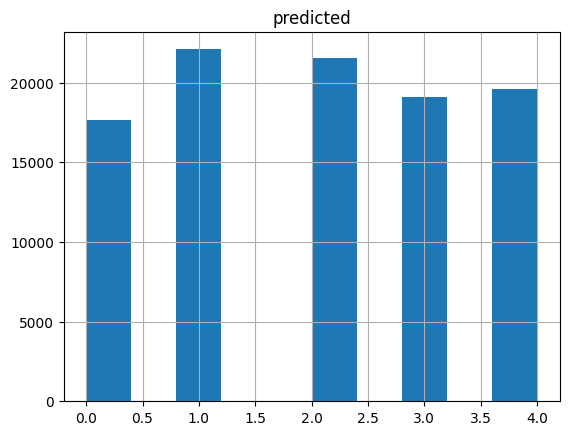

In [119]:
df_train = pd.DataFrame({'predicted': indices})
df_train.hist()

In [120]:
unique_values, counts = np.unique(indices, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f'Value: {value}, Count: {count}')

Value: 0, Count: 17653
Value: 1, Count: 22089
Value: 2, Count: 21542
Value: 3, Count: 19103
Value: 4, Count: 19613


In [121]:
rnn.save('RNN-FINAL')

Now that we have tried different hand-made models respective to GloVe embedding and NaiveBayes Classifier (not mentioned in the notebook), we will use BERT pre-trained model to check for significant increase in Accuracy.